In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc

In [3]:
from Poisson_Cyl import Poisson_Cyl as p_solver
from Poisson_Cyl import Sphere as sph

In [4]:
NN = 32

rho = 10.0                    ## density inside sphere
R0  = 2.0                     ## radius of sphere
x0, y0, z0 = 0.0, -4.1, 4.0   ## center of the sphere

In [5]:
# Start simulation domain
run1 = p_solver(32, method="convolution")

# get coordinate
crt_x1, crt_x2, crt_x3 = run1.get_crt_coord()

In [11]:
# Prepare for the density distribution
show_face = sph(rho, R0, -3, 3.5, z0, crt_x1, crt_x2, crt_x3)
show_face.add_sphere(rho, R0, 3.0, 3.5, z0)
show_face.add_sphere(rho*5.0, R0/2.0, 0.0, -5.0, z0)
show_face.add_sphere(rho*5.0, R0/2.0, -4.0, -3.3, z0)
show_face.add_sphere(rho*5.0, R0/2.0, 4.0, -3.3, z0)

In [12]:
# Init density distributin
run1.init_problem(show_face)

In [13]:
convl_potential = run1.solve()

In [14]:
convl_analytic  = run1.analytic_sol()
convl_error     = run1.error()
convl_error_rel = convl_error/convl_analytic
convl_L1        = run1.L1_error()
print(convl_L1)

0.00792663623628


Text(0.5,0.98,'N = 32, L1 = 0.00792663623628')

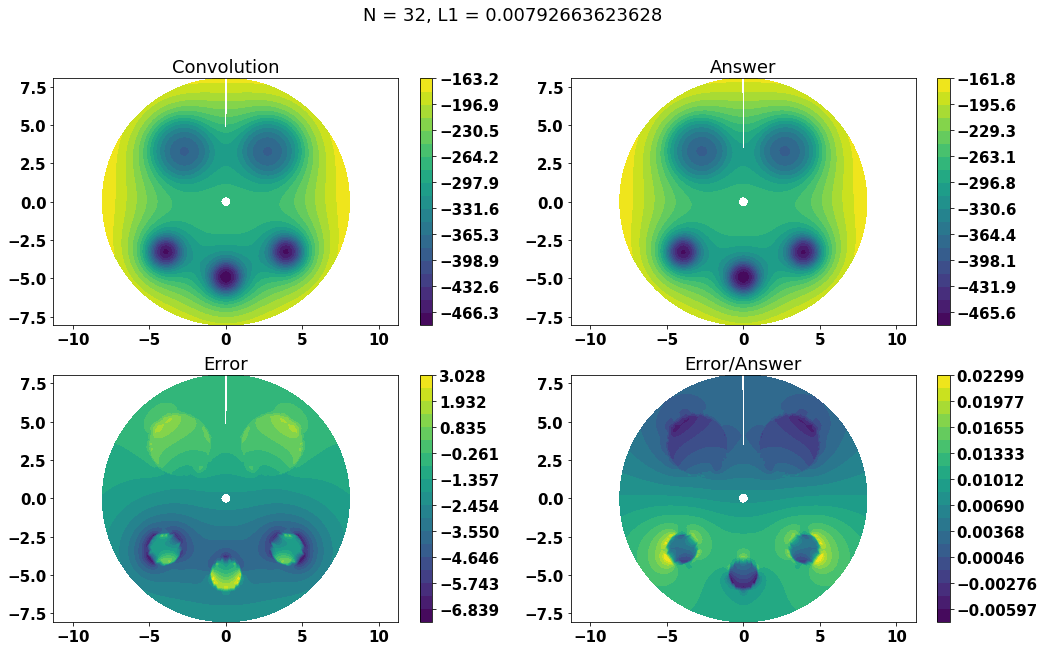

In [15]:
## Compare Phi solution
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
plt.figure(figsize=(17, 10))

plan = int(NN/2)

plt.subplot(221)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_potential[:,:,plan], 
             levels=np.linspace(np.min(convl_potential[:,:,plan]), np.max(convl_potential[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Convolution")
plt.colorbar()

plt.subplot(222)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_analytic[:,:,plan], 
             levels=np.linspace(np.min(convl_analytic[:,:,plan]), np.max(convl_analytic[:,:,plan]), 20), 
             cmap="viridis" )
plt.axis('equal')
plt.title("Answer")
plt.colorbar()


plt.subplot(223)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error[:,:,plan], 
             levels=np.linspace(np.min(convl_error[:,:,plan]), np.max(convl_error[:,:,plan]), 20), 
             cmap="viridis")
plt.axis('equal')
plt.title("Error")
plt.colorbar()

plt.subplot(224)
plt.contourf(crt_x1[:,:,0], crt_x2[:,:,0], convl_error_rel[:,:,plan], 
             levels=np.linspace(np.min(convl_error_rel[:,:,plan]), np.max(convl_error_rel[:,:,plan]), 20), 
             cmap="viridis")

plt.axis('equal')
plt.title(r"Error/Answer")
plt.colorbar()

plt.suptitle("N = " + str(NN) + ", L1 = " + str(convl_L1))